In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
df = pd.read_csv("/Documents/cohort_analysis/online_retail_II.csv")

In [51]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [16]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])
oldest_date = df['InvoiceDate'].min().strftime('%Y-%m')
newest_date = df['InvoiceDate'].max().strftime('%Y-%m')

In [17]:
oldest_date

'2009-12'

In [18]:
newest_date

'2011-12'

In [19]:
df.isnull().any()

Invoice        False
StockCode      False
Description     True
Quantity       False
InvoiceDate    False
Price          False
Customer ID     True
Country        False
dtype: bool

In [21]:
df[df['Description'].isnull()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.0,NaN,United Kingdom
3114,489655,20683,NaN,-44,2009-12-01 17:26:00,0.0,NaN,United Kingdom
3161,489659,21350,NaN,230,2009-12-01 17:39:00,0.0,NaN,United Kingdom
3731,489781,84292,NaN,17,2009-12-02 11:45:00,0.0,NaN,United Kingdom
4296,489806,18010,NaN,-770,2009-12-02 12:42:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
1060783,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
1060787,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
1060793,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
1062442,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [26]:
df[df['Customer ID'].isnull()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
1066997,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
1066998,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
1066999,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
1067000,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [30]:
df[df['Invoice'].str.startswith(('c','C'))]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
1065910,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
1067002,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
1067176,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
1067177,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


Change customer ID to integer

In [57]:
df['Customer ID'] = df['Customer ID'].astype('Int64')


In [60]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom


In [62]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

In [64]:
df["invoice_dt"]=df['InvoiceDate'].dt.date
df["invoice_time"]=df['InvoiceDate'].dt.time

In [66]:
df.drop(columns = ['InvoiceDate'],inplace=True)

In [68]:
df.rename(columns={"Invoice":"invoice","StockCode":"stock_code","Description":"description","Quantity":"quantity","Price":"price","Customer ID":"customer_id","Country":"country"},inplace=True)

In [69]:
df.head()

,invoice,stock_code,description,quantity,price,customer_id,country,invoice_dt,invoice_time
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,13085,United Kingdom,2009-12-01,07:45:00
1,489434,79323P,PINK CHERRY LIGHTS,12,6.75,13085,United Kingdom,2009-12-01,07:45:00
2,489434,79323W,WHITE CHERRY LIGHTS,12,6.75,13085,United Kingdom,2009-12-01,07:45:00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,13085,United Kingdom,2009-12-01,07:45:00
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,13085,United Kingdom,2009-12-01,07:45:00


In [72]:
unique_stock = df[['stock_code','description']].drop_duplicates()
unique_stock

,stock_code,description
0,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS
1,79323P,PINK CHERRY LIGHTS
2,79323W,WHITE CHERRY LIGHTS
3,22041,"RECORD FRAME 7"" SINGLE SIZE"
4,21232,STRAWBERRY CERAMIC TRINKET BOX
...,...,...
1062371,23090,missing
1063082,85123A,CREAM HANGING HEART T-LIGHT HOLDER
1064015,85175,NaN
1064386,23169,smashed


In [29]:
from sqlalchemy import create_engine
engine = create_engine('connection details')



In [78]:
unique_stock.to_sql('stock',engine,if_exists='replace',index=False)


21

In [30]:
query = """WITH cohort_activity AS (
    SELECT 
        cohort_data.start_month AS start_month,
        DATE_TRUNC('month', sales_invoice.invoice_dt)::date AS activity_month,
        COUNT(DISTINCT sales_invoice.customer_id)::NUMERIC AS active_user
    FROM cohort_data
    JOIN sales_invoice
        ON cohort_data.customer_id = sales_invoice.customer_id
    GROUP BY cohort_data.start_month, activity_month
),
cohort_size AS (
    SELECT 
        start_month,
        COUNT(DISTINCT customer_id) AS total_user
    FROM cohort_data
    GROUP BY start_month
)
SELECT 
    cohort_activity.start_month,
    cohort_activity.activity_month,
    (EXTRACT(YEAR FROM AGE(cohort_activity.activity_month,cohort_activity.start_month))*12 +
    EXTRACT(MONTH FROM AGE(cohort_activity.activity_month, cohort_activity.start_month)))::INT AS num_of_months,
    cohort_activity.active_user,
    ROUND((cohort_activity.active_user / cohort_size.total_user),2) AS retention_rate
FROM cohort_activity
JOIN cohort_size
    ON cohort_activity.start_month = cohort_size.start_month
ORDER BY cohort_activity.start_month, cohort_activity.activity_month;
"""

retention_data = pd.read_sql_query(query, engine)
retention_data.head(50)

,start_month,activity_month,num_of_months,active_user,retention_rate
0,2009-12-01,2009-12-01,0,955.0,1.00
1,2009-12-01,2010-01-01,1,337.0,0.35
2,2009-12-01,2010-02-01,2,319.0,0.33
3,2009-12-01,2010-03-01,3,406.0,0.43
4,2009-12-01,2010-04-01,4,363.0,0.38
5,2009-12-01,2010-05-01,5,343.0,0.36
6,2009-12-01,2010-06-01,6,360.0,0.38
7,2009-12-01,2010-07-01,7,327.0,0.34
8,2009-12-01,2010-08-01,8,321.0,0.34
9,2009-12-01,2010-09-01,9,346.0,0.36


In [32]:
heatmap_data = retention_data.pivot_table(index='start_month',columns='num_of_months',values='retention_rate')
heatmap_data = heatmap_data.iloc[:,1:]
heatmap_data.index = pd.to_datetime(heatmap_data.index, format='Cohort %d').strftime('%b-%Y')
heatmap_data

num_of_months,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
start_month,,,,,,,,,,,,,,,,,,,,,
Dec-2009,0.35,0.33,0.43,0.38,0.36,0.38,0.34,0.34,0.36,0.42,...,0.30,0.26,0.30,0.28,0.26,0.26,0.32,0.30,0.41,0.2
Jan-2010,0.21,0.31,0.31,0.26,0.30,0.26,0.23,0.28,0.32,0.30,...,0.15,0.23,0.20,0.19,0.20,0.24,0.19,0.25,0.06,NaN
Feb-2010,0.24,0.22,0.29,0.24,0.20,0.19,0.28,0.25,0.27,0.11,...,0.20,0.16,0.16,0.14,0.23,0.23,0.16,0.06,NaN,NaN
Mar-2010,0.19,0.23,0.24,0.23,0.20,0.25,0.30,0.28,0.11,0.12,...,0.17,0.17,0.16,0.18,0.20,0.21,0.08,NaN,NaN,NaN
Apr-2010,0.19,0.19,0.16,0.18,0.22,0.28,0.26,0.11,0.11,0.07,...,0.16,0.14,0.15,0.18,0.22,0.06,NaN,NaN,NaN,NaN
May-2010,0.16,0.17,0.17,0.18,0.26,0.21,0.13,0.06,0.08,0.11,...,0.13,0.14,0.17,0.15,0.05,NaN,NaN,NaN,NaN,NaN
Jun-2010,0.17,0.19,0.20,0.23,0.29,0.13,0.09,0.08,0.12,0.11,...,0.12,0.13,0.20,0.05,NaN,NaN,NaN,NaN,NaN,NaN
Jul-2010,0.16,0.18,0.30,0.29,0.14,0.11,0.15,0.15,0.11,0.13,...,0.17,0.24,0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aug-2010,0.20,0.30,0.32,0.17,0.12,0.10,0.12,0.14,0.13,0.13,...,0.20,0.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


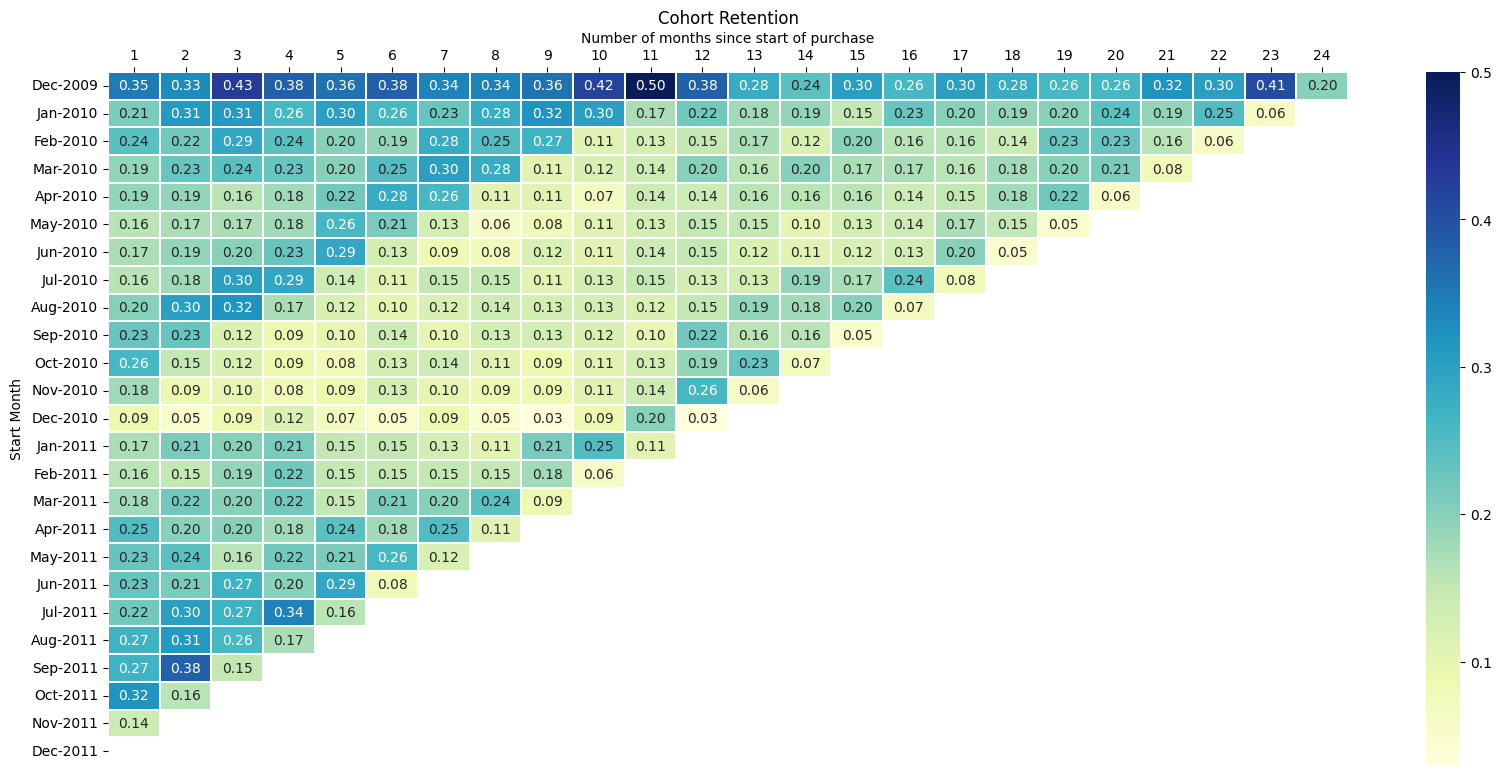

In [33]:
plt.figure(figsize=(20,9))
sns.heatmap(heatmap_data,annot=True,cmap='YlGnBu',fmt=".2f",linewidths = 0.1,linecolor='white')
plt.title('Cohort Retention')
plt.xlabel('Number of months since start of purchase')
plt.gca().xaxis.set_label_position('top')
plt.gca().xaxis.set_ticks_position('top')
plt.ylabel('Start Month')
plt.show()

In [44]:
query = """WITH cohort_revenue AS (
    SELECT 
        cohort_data.start_month AS start_month,
        DATE_TRUNC('month', sales_invoice.invoice_dt)::date AS activity_month,
        SUM(sales_invoice.quantity * sales_invoice.price)::NUMERIC AS revenue
    FROM cohort_data
    JOIN sales_invoice
        ON cohort_data.customer_id = sales_invoice.customer_id
    GROUP BY cohort_data.start_month, activity_month
    ORDER BY cohort_data.start_month, activity_month
    
),

total_monthly_revenue AS (
    SELECT 
        activity_month,
        SUM(revenue) AS total
    FROM cohort_revenue
    GROUP BY activity_month
    
) 

SELECT 
    cohort_revenue.start_month,
    cohort_revenue.activity_month,
    (EXTRACT(YEAR FROM AGE(cohort_revenue.activity_month,cohort_revenue.start_month))*12 +
    EXTRACT(MONTH FROM AGE(cohort_revenue.activity_month, cohort_revenue.start_month)))::INT AS num_of_months,
    ROUND((cohort_revenue.revenue/total_monthly_revenue.total),2) AS revenue_percent
FROM cohort_revenue
JOIN total_monthly_revenue
    ON cohort_revenue.activity_month = total_monthly_revenue.activity_month
ORDER BY cohort_revenue.start_month, cohort_revenue.activity_month;
"""

revenue_data = pd.read_sql_query(query, engine)
revenue_data.head(50)

,start_month,activity_month,num_of_months,revenue_percent
0,2009-12-01,2009-12-01,0,1.00
1,2009-12-01,2010-01-01,1,0.71
2,2009-12-01,2010-02-01,2,0.59
3,2009-12-01,2010-03-01,3,0.54
4,2009-12-01,2010-04-01,4,0.52
5,2009-12-01,2010-05-01,5,0.51
6,2009-12-01,2010-06-01,6,0.47
7,2009-12-01,2010-07-01,7,0.53
8,2009-12-01,2010-08-01,8,0.55
9,2009-12-01,2010-09-01,9,0.47


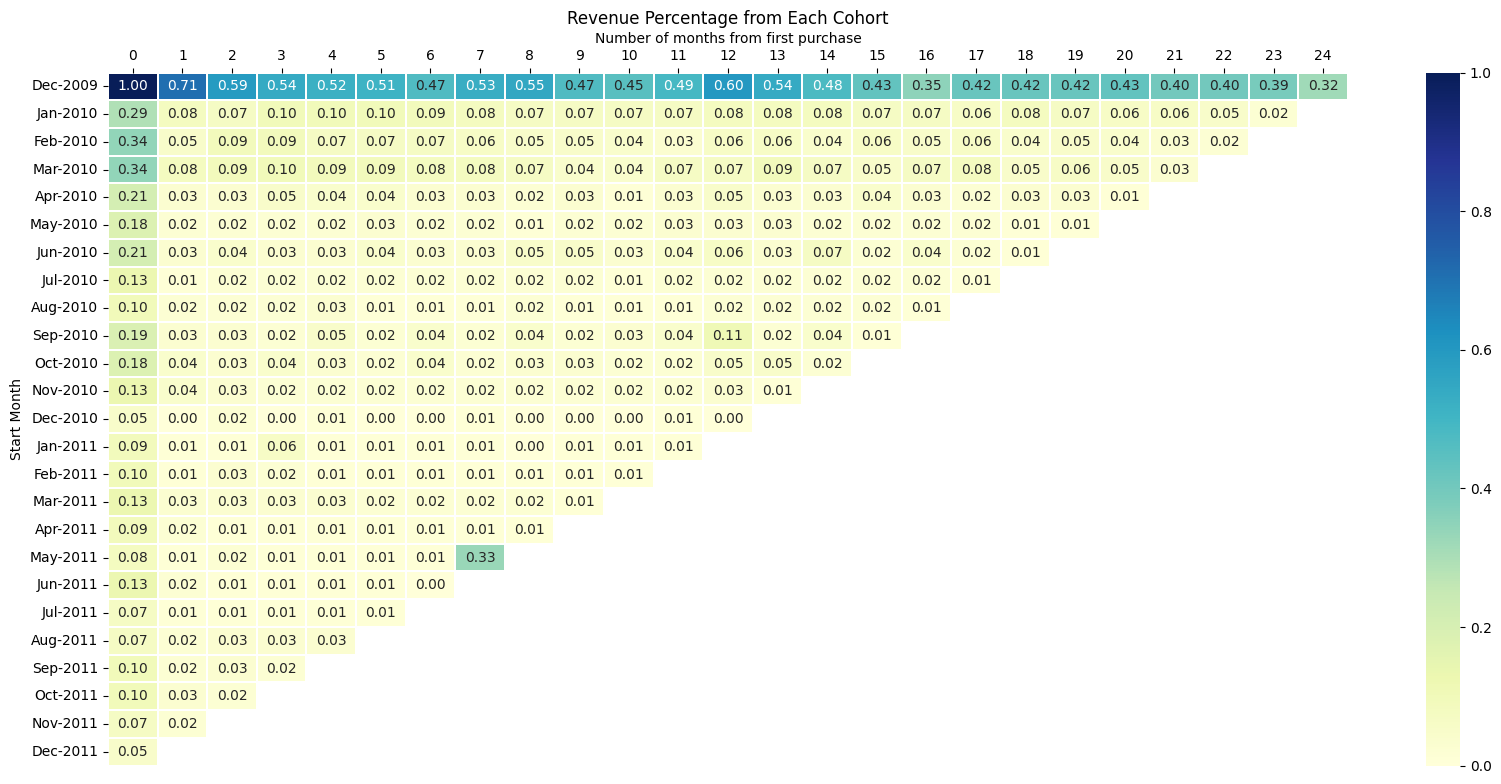

In [45]:
revenue_heatmap = revenue_data.pivot_table(index='start_month',columns='num_of_months',values='revenue_percent')
revenue_heatmap.index = pd.to_datetime(revenue_heatmap.index).strftime('%b-%Y')
plt.figure(figsize=(20,9))
sns.heatmap(revenue_heatmap,annot=True,cmap='YlGnBu',fmt=".2f",linewidths = 0.1,linecolor='white')
plt.title('Revenue Percentage from Each Cohort')
plt.xlabel('Number of months from first purchase')
plt.gca().xaxis.set_label_position('top')
plt.gca().xaxis.set_ticks_position('top')
plt.ylabel('Start Month')
plt.show()


In [34]:
query = """WITH cohort_spending AS (
    SELECT 
        cohort_data.start_month AS start_month,
        DATE_TRUNC('month', sales_invoice.invoice_dt)::date AS activity_month,
        SUM(sales_invoice.quantity * sales_invoice.price)::NUMERIC AS spending
    FROM cohort_data
    JOIN sales_invoice
        ON cohort_data.customer_id = sales_invoice.customer_id
    GROUP BY cohort_data.start_month, activity_month
    
),

cohort_total_spending AS (
    SELECT 
        activity_month,
        SUM(spending) AS total_spending
    FROM cohort_spending
    GROUP BY activity_month
) 

SELECT 
    cohort_spending.start_month,
    cohort_spending.activity_month,
    (EXTRACT(YEAR FROM AGE(cohort_spending.activity_month,cohort_spending.start_month))*12 +
    EXTRACT(MONTH FROM AGE(cohort_spending.activity_month, cohort_spending.start_month)))::INT AS num_of_months,
    ROUND((cohort_spending.spending/cohort_active_user.active_user),2) AS average_spending,
    ROUND((cohort_spending.spending/cohort_total_spending.total_spending),2) AS spending_percent
FROM cohort_spending
JOIN cohort_total_spending
      ON cohort_spending.activity_month = cohort_total_spending.activity_month
JOIN cohort_active_user
      ON cohort_spending.activity_month = cohort_active_user.activity_month
      AND cohort_spending.start_month = cohort_active_user.start_month
ORDER BY cohort_spending.start_month, cohort_spending.activity_month;
"""

spending_data = pd.read_sql_query(query, engine)
spending_data.head(50)

,start_month,activity_month,num_of_months,average_spending,spending_percent
0,2009-12-01,2009-12-01,0,719.01,1.00
1,2009-12-01,2010-01-01,1,1173.37,0.71
2,2009-12-01,2010-02-01,2,930.41,0.59
3,2009-12-01,2010-03-01,3,935.11,0.54
4,2009-12-01,2010-04-01,4,845.42,0.52
5,2009-12-01,2010-05-01,5,891.99,0.51
6,2009-12-01,2010-06-01,6,841.27,0.47
7,2009-12-01,2010-07-01,7,958.72,0.53
8,2009-12-01,2010-08-01,8,1035.82,0.55
9,2009-12-01,2010-09-01,9,1134.79,0.47


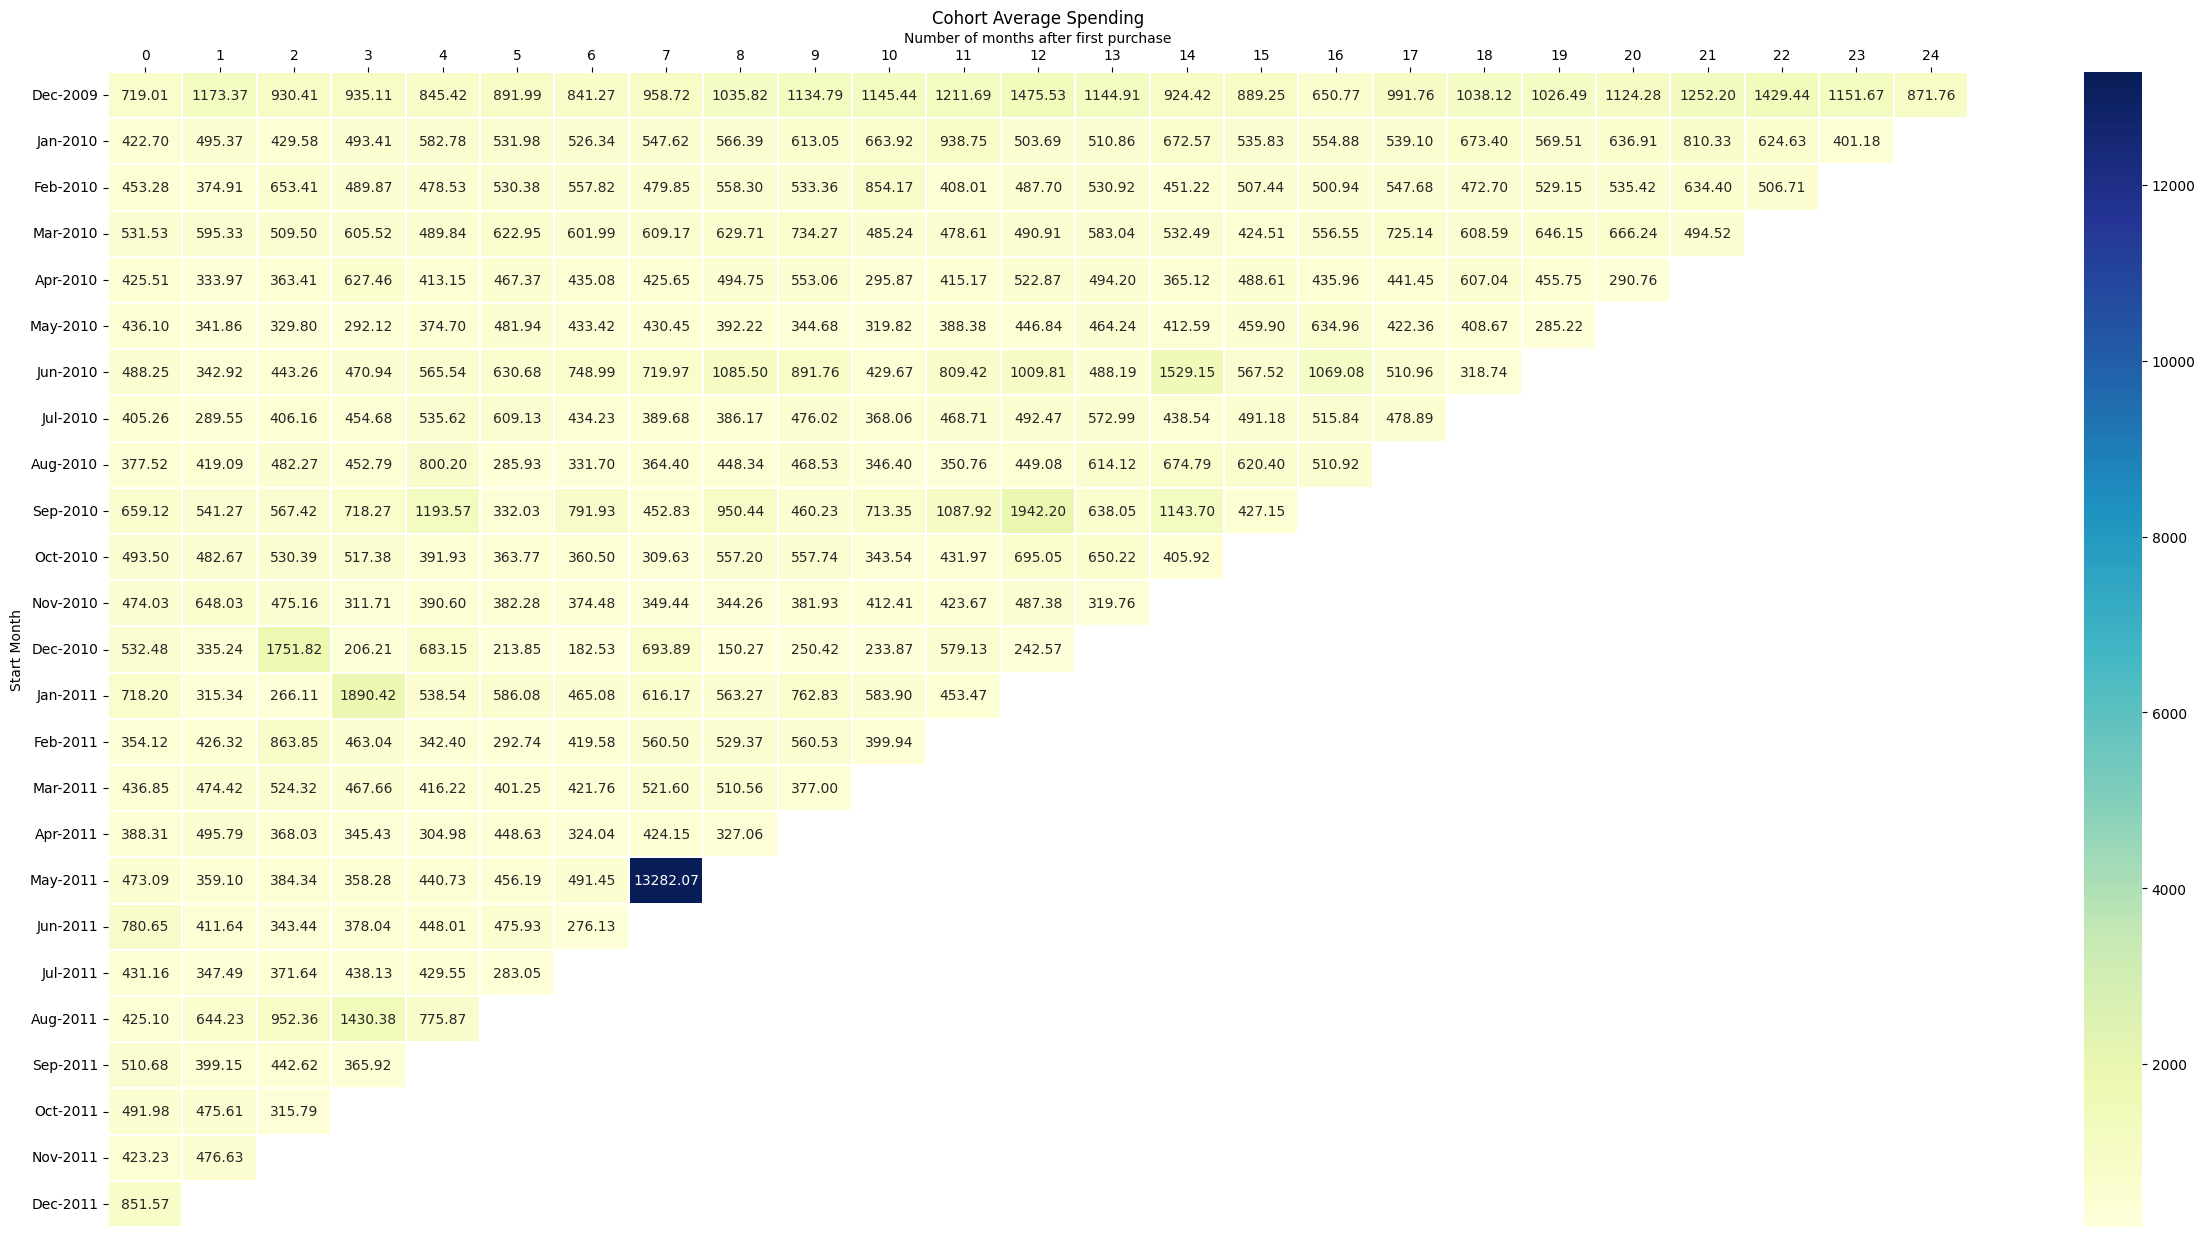

In [38]:
spending_heatmap = spending_data.pivot_table(index='start_month',columns='num_of_months',values='average_spending')
spending_heatmap.index = pd.to_datetime(spending_heatmap.index).strftime('%b-%Y')
plt.figure(figsize=(30,15))
sns.heatmap(spending_heatmap,annot=True,cmap='YlGnBu',fmt=".2f",linewidths = 0.1,linecolor='white')
plt.title('Cohort Average Spending')
plt.xlabel('Number of months after first purchase')
plt.gca().xaxis.set_label_position('top')
plt.gca().xaxis.set_ticks_position('top')
plt.ylabel('Start Month')
plt.show()

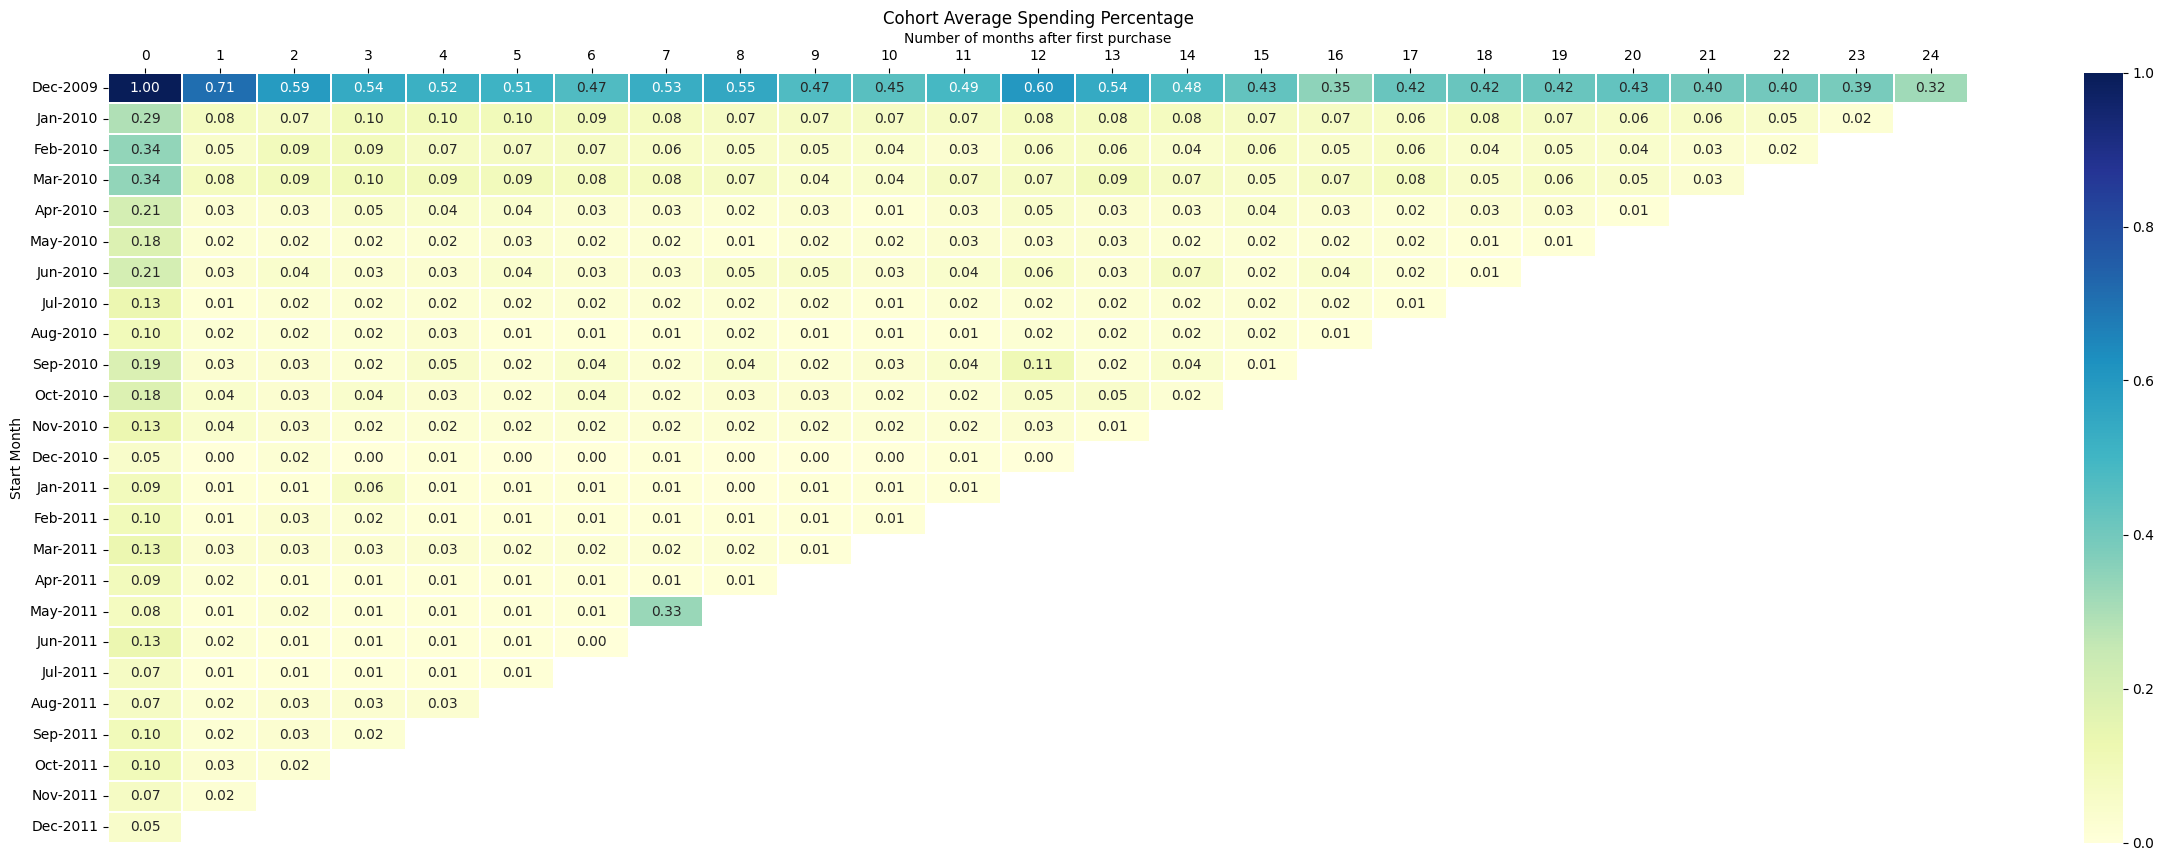

In [40]:
spending_heatmap = spending_data.pivot_table(index='start_month',columns='num_of_months',values='spending_percent')
spending_heatmap.index = pd.to_datetime(spending_heatmap.index).strftime('%b-%Y')
plt.figure(figsize=(30,10))
sns.heatmap(spending_heatmap,annot=True,cmap='YlGnBu',fmt=".2f",linewidths = 0.1,linecolor='white')
plt.title('Cohort Average Spending Percentage')
plt.xlabel('Number of months after first purchase')
plt.gca().xaxis.set_label_position('top')
plt.gca().xaxis.set_ticks_position('top')
plt.ylabel('Start Month')
plt.show()

In [15]:
query = """
--Find out how many customers are gained each month
    SELECT start_month,
        COUNT(customer_id) 
    FROM cohort_data
    GROUP BY start_month
    ORDER BY start_month
"""

customer = pd.read_sql_query(query, engine)



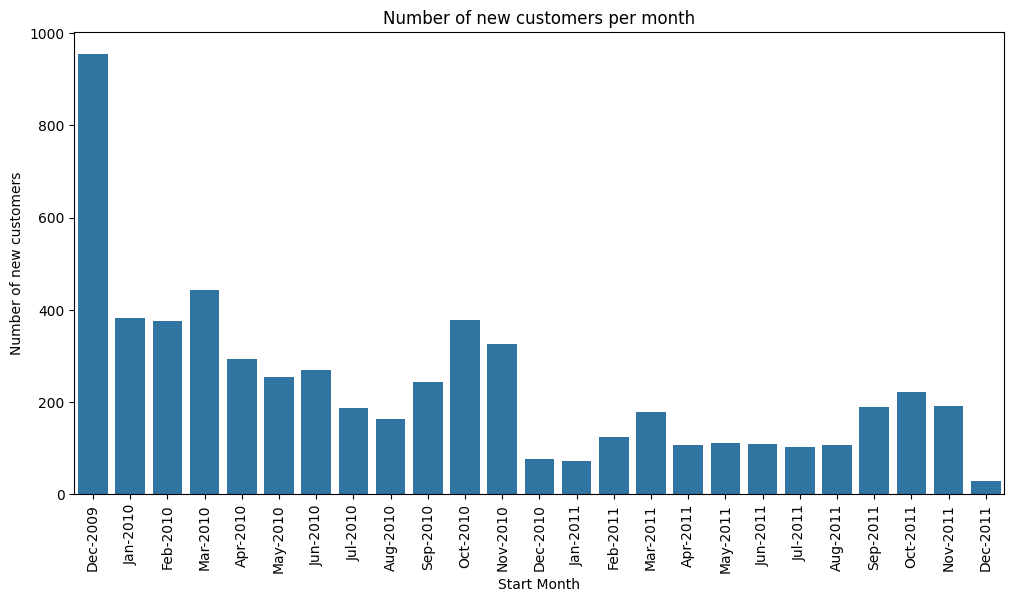

In [16]:
customer['start_month'] = pd.to_datetime(customer['start_month'])
customer['start_month'] = customer['start_month'].dt.strftime('%b-%Y')
plt.figure(figsize=(12, 6))
sns.barplot(x='start_month', y='count', data=customer)
plt.xlabel('Start Month')
plt.ylabel('Number of new customers')
plt.title('Number of new customers per month')
plt.xticks(rotation=90)
plt.show()

In [25]:
query = """
-- where are most of their customers based in
WITH total_customers AS (
    SELECT SUM(COUNT(DISTINCT sales_invoice.customer_id)) OVER () AS total_customers
    FROM sales_invoice
)
SELECT 
    COUNT(DISTINCT sales_invoice.customer_id) AS customer_count,
    ROUND(COUNT(DISTINCT sales_invoice.customer_id) / total_customers.total_customers,4) AS percentage,
    country
FROM 
    sales_invoice,
    total_customers
GROUP BY 
    country, total_customers.total_customers
ORDER BY 
    customer_count DESC;
"""

country = pd.read_sql_query(query, engine)
country

,customer_count,percentage,country
0,5353,0.9102,United Kingdom
1,107,0.0182,Germany
2,95,0.0162,France
3,41,0.0070,Spain
4,29,0.0049,Belgium
5,24,0.0041,Portugal
6,22,0.0037,Switzerland
7,22,0.0037,Netherlands
8,19,0.0032,Sweden
9,17,0.0029,Italy
